In [1]:
import numpy as np 
import pandas as pd

In [2]:
# Graphing libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
dataset = pd.read_csv('Dataset.csv')

In [4]:
dataset.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,61250,21139,2,165,90.0,150,100,3,2,0,0,1,1
1,8444,15946,2,173,70.0,120,80,1,1,0,0,1,1
2,47236,21255,1,148,67.0,130,80,1,1,0,0,1,0
3,49559,22739,1,155,52.0,120,80,1,1,0,0,1,1
4,84574,16761,1,164,68.0,110,70,1,1,0,0,1,1


In [5]:
dataset.isna().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [6]:
dataset.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,63000.000000,63000.000000,63000.000000,63000.000000,63000.000000,63000.000000,63000.000000,63000.000000,63000.000000,63000.000000,63000.000000,63000.000000,63000.000000
mean,49975.337063,19466.453698,1.348556,164.346143,74.212521,128.757984,96.919825,1.366222,1.226413,0.088254,0.054032,0.803873,0.499698
std,28866.099118,2467.913242,0.476517,8.197206,14.396882,149.139996,192.979179,0.679741,0.571753,0.283666,0.226082,0.397069,0.500004
min,0.000000,10798.000000,1.000000,55.000000,11.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25007.750000,17662.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,49967.000000,19702.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74944.250000,21325.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,14020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


# Observations

# 1. Gender

In [7]:
dataset["gender"].value_counts()/len(dataset)*100

1    65.144444
2    34.855556
Name: gender, dtype: float64

In [8]:
# Need to determine which gender is male and which is female to draw any conclusions. First convert 1/2 to 0/1. 
dataset["gender"] = dataset["gender"].apply(lambda x: x-1)

In [9]:
dataset["gender"].value_counts()/len(dataset)*100

0    65.144444
1    34.855556
Name: gender, dtype: float64

In [10]:
# Using the height as an indicator of which gender is 1. On average, the taller gender will be male.
dataset.groupby(by = "gender").mean()

,id,age,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
gender,,,,,,,,,,,,
0,49943.707000,19506.935065,161.339733,72.587813,127.949490,94.937136,1.384323,1.235496,0.017860,0.025487,0.802173,0.496284
1,50034.453117,19390.794708,169.965071,77.249073,130.269047,100.625438,1.332392,1.209436,0.219819,0.107382,0.807050,0.506080


In [11]:
# Gender 1 is taller. The column will be renamed to 'male' for clarity.
dataset.rename(columns = {"gender": "male"}, inplace = True)

<Axes: title={'center': 'Height Data'}, ylabel='Height (cms)'>

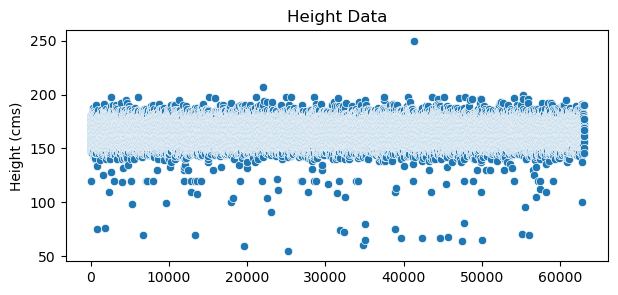

In [12]:
# Checking the distribution for outliers

plt.figure(figsize = (7,3))
plt.title("Height Data")
plt.ylabel("Height (cms)")
sns.scatterplot(data = dataset["height"])

In [13]:
# For outliers, the condition Achondroplasia, also known as dwarfism, will be taken as a lower limit.  
# People with Achondroplasia may have an increased risk of cardiovascular diseases [1], which would affect the data analysis for the focused parameters.
# A height of 4'10" or 148 cm will be used to cutoff the data. This is as per Little People of America (LPA)

# Checking the percent of samples.
(dataset["height"] < 148).value_counts()/len(dataset)*100

False    98.698413
True      1.301587
Name: height, dtype: float64

In [14]:
# Removing the data that has a high likeliness of the patient having Achondroplasia. It is only 1.3 % of the data

dataset = dataset[dataset["height"] > 148]

In [15]:
# There are only 2 data points above 200 cm so those will be removed as well.
dataset = dataset[dataset["height"] < 201]

# 2. Weight

In [16]:
# Adding a new parameter for Body Mass Index (bmi), a metric used to classify weight per height class.
# This will be a better indicator of health using weight and height.
# BMI = kg/m2

dataset["bmi"] = dataset["weight"] *10000 / ((dataset["height"])**2)

In [17]:
# Now the bmi can be split into classes of bmi, which would help understand the data more.

bmi_ranges = [
    (dataset["bmi"] <= 15),                                 # 0 - Anorexic
    (dataset["bmi"] > 15) & (dataset["bmi"] <= 18.5),       # 1 - Underweight
    (dataset["bmi"] > 18.5) & (dataset["bmi"] <= 25),       # 2 - Normal weight
    (dataset["bmi"] > 25) & (dataset["bmi"] <= 30),         # 3 - Overweight
    (dataset["bmi"] > 30) & (dataset["bmi"] <= 35),         # 4 - Obesity Class I
    (dataset["bmi"] > 35) & (dataset["bmi"] <= 40),         # 5 - Obesity Class II
    (dataset["bmi"] > 40)                                   # 6 - Obesity Class III 
]

classes = [0, 1, 2, 3, 4, 5, 6]

dataset["bmi_class"] = np.select(bmi_ranges, classes)

# 4. Blood pressure

<Axes: title={'center': 'Blood Pressure Data'}, xlabel='Systolic Blood Pressure (mmHg)', ylabel='Diastolic Blood Pressure (mmHg)'>

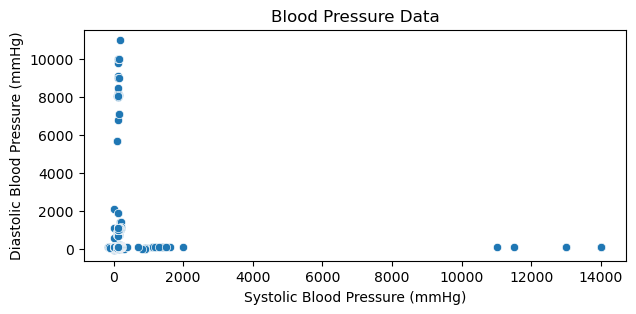

In [18]:
# Checking the distribution for outliers

plt.figure(figsize = (7,3))
plt.title("Blood Pressure Data")
plt.xlabel("Systolic Blood Pressure (mmHg)")
plt.ylabel("Diastolic Blood Pressure (mmHg)")
sns.scatterplot(data = dataset, x = "ap_hi", y = "ap_lo")

<Axes: title={'center': 'Blood Pressure Data'}, xlabel='Systolic Blood Pressure (mmHg)', ylabel='Diastolic Blood Pressure (mmHg)'>

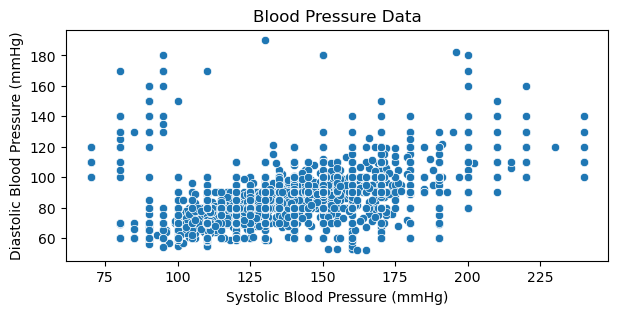

In [19]:
# The blood pressure data is out of proportion and should not be in the thousands. Outliers will be removed and checked again.

# Checking the distribution for outliers within the narrower ranges

plt.figure(figsize = (7,3))
plt.title("Blood Pressure Data")
plt.xlabel("Systolic Blood Pressure (mmHg)")
plt.ylabel("Diastolic Blood Pressure (mmHg)")
sns.scatterplot(data = dataset[(dataset["ap_hi"] < 400) & (dataset["ap_lo"] < 350) & (dataset["ap_hi"] > 50) & (dataset["ap_lo"] > 50)], x = "ap_hi", y = "ap_lo")

#Upon iterating through the graphs, the present limits seem to be ideal for removing outliers.

In [20]:
# Checking the length of the dataframe with the conditions in comparison to the one including the outliers, for blood pressure.

len(dataset[(dataset["ap_hi"] < 400) & (dataset["ap_lo"] < 350) & (dataset["ap_hi"] > 50) & (dataset["ap_lo"] > 50)]) / len(dataset)*100

98.14560550503174

In [21]:
# It removes around 1.85% data
# Removing the outliers

dataset = dataset[(dataset["ap_hi"] < 400) & (dataset["ap_lo"] < 350) & (dataset["ap_hi"] > 50) & (dataset["ap_lo"] > 50)]

In [22]:
# Re-arranging to have the target at the end
dataset.insert(len(dataset.columns)-1, 'cardio', dataset.pop('cardio'))


# Analysis

<Axes: >

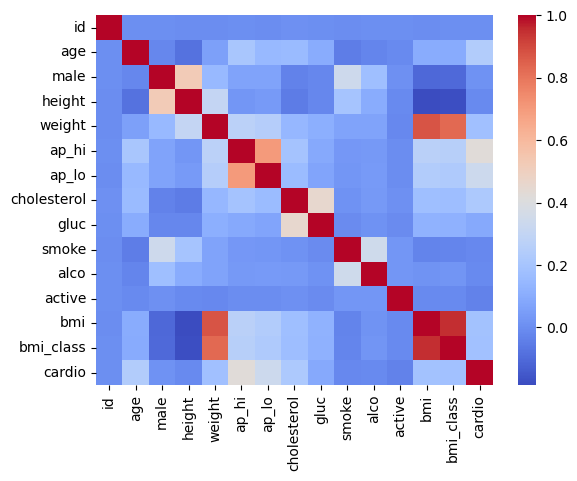

In [23]:
sns.heatmap(dataset.corr(), cmap = "coolwarm")

# There are no specifically high correlations apart from the ones already known.

In [24]:
# Grouping the headers. There are correlations between ap_hi - ap_lo and height/weight - bmi. Height and Weight can be ignored and replaced with bmi.

subjective = ["smoke", "alco", "active"]

classification = ["male", "cholesterol", "gluc"]

linear = ["age", "ap_hi", "ap_lo", "bmi"] 

In [25]:
dataset.corr()["cardio"].sort_values()


active        -0.036028
smoke         -0.017350
alco          -0.010947
height        -0.009537
id             0.004069
male           0.009673
gluc           0.089909
weight         0.177921
bmi_class      0.180951
bmi            0.187693
cholesterol    0.219437
age            0.238912
ap_lo          0.336967
ap_hi          0.425331
cardio         1.000000
Name: cardio, dtype: float64

<Axes: title={'center': 'Cardiovascular disease per age'}, xlabel='age', ylabel='count'>

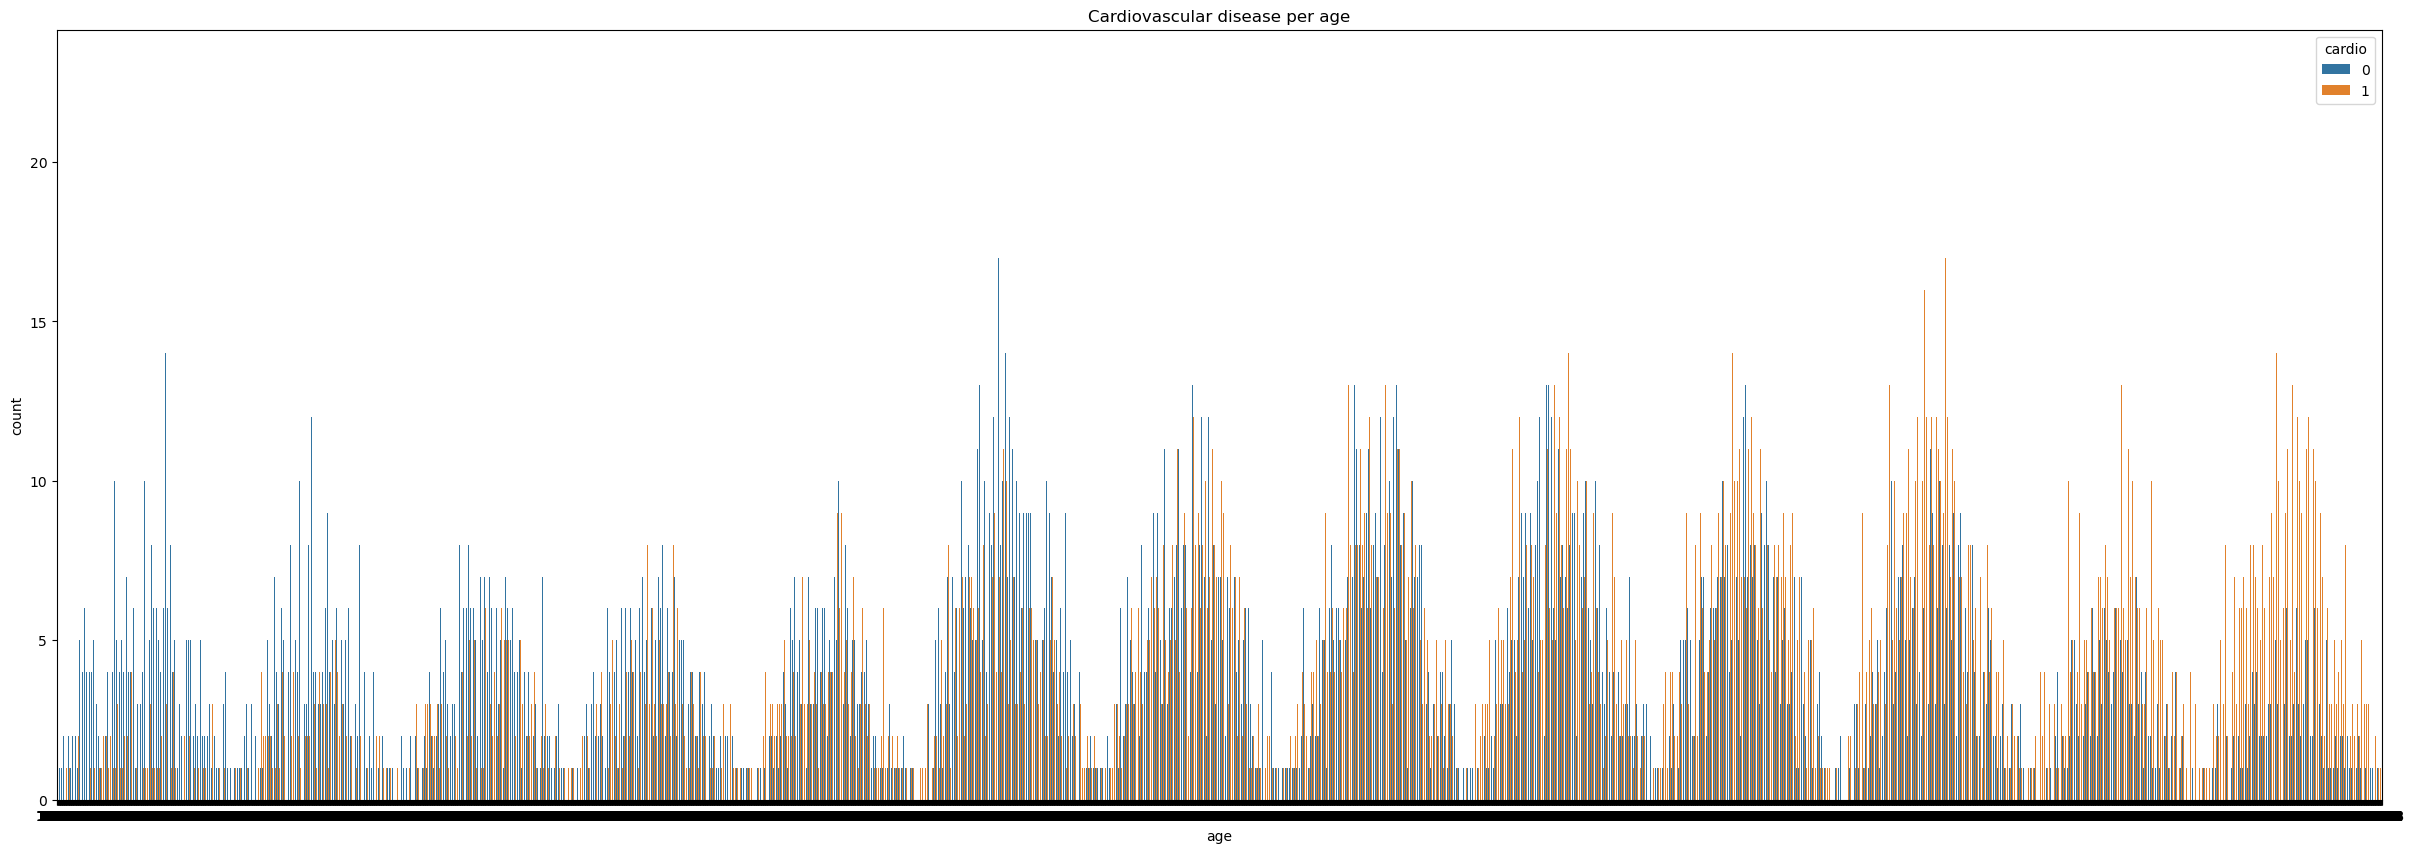

In [26]:
plt.figure(figsize = (30,10))
plt.title("Cardiovascular disease per age")
plt.xlabel("Age (yrs)")

sns.countplot(data = dataset, x = "age",  hue = "cardio")

# For an unknown reason, there are considerably more patients with an even yearly age than an odd yearly age. 


C:\Users\Dell\AppData\Local\Temp\ipykernel_10804\3482387097.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dataset.groupby(by = "age")[ "ap_hi", "ap_lo"].mean().plot()


Text(0.5, 0, 'Age (yrs)')

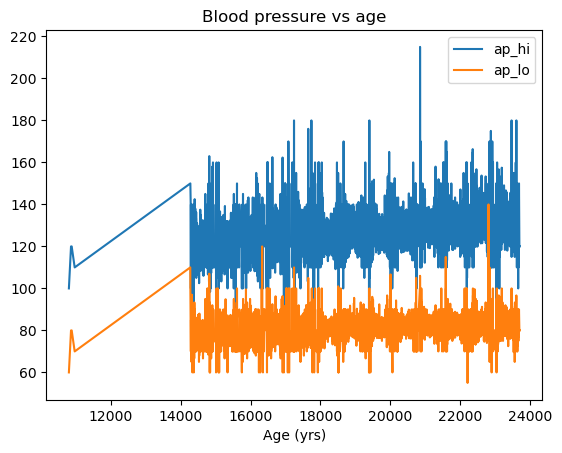

In [27]:
dataset.groupby(by = "age")[ "ap_hi", "ap_lo"].mean().plot()
plt.title("Blood pressure vs age")
plt.xlabel("Age (yrs)")

# There is an increase in blood pressure with age

Text(0.5, 0, 'Age (yrs)')

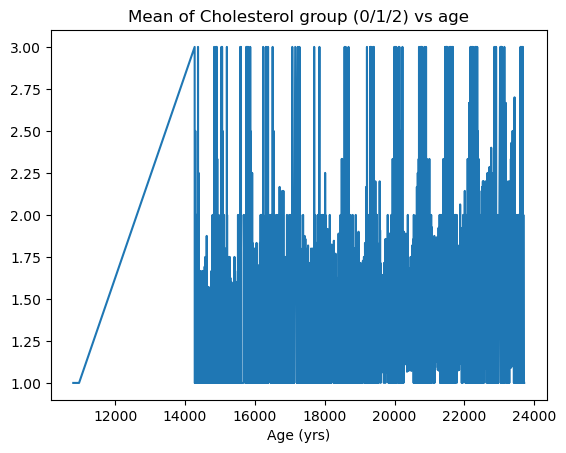

In [28]:
dataset.groupby(by = "age")[ "cholesterol"].mean().plot()
plt.title("Mean of Cholesterol group (0/1/2) vs age")
plt.xlabel("Age (yrs)")

# There is an increase in cholesterol with age

C:\Users\Dell\AppData\Local\Temp\ipykernel_10804\1630460896.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dataset.groupby(by = "age")[ "alco", "smoke"].mean().plot()


Text(0.5, 0, 'Age (yrs)')

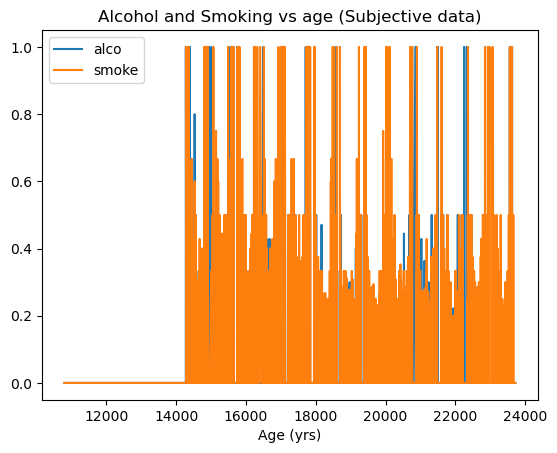

In [29]:
dataset.groupby(by = "age")[ "alco", "smoke"].mean().plot()
plt.title("Alcohol and Smoking vs age (Subjective data)")
plt.xlabel("Age (yrs)")

# As age increases, there is a decrease in the consumption of alcohol and smoking. This may be due to a variety of reasons: 
#       1. Increase in lying amongst elder patients
#       2. Generational difference in the interest in consumptions
#       3. Or as would have been ideally predicted through the data, a decrease in consumption as age increases due to growing concerns for health

Text(0, 0.5, 'Cardiovascular disease Presence')

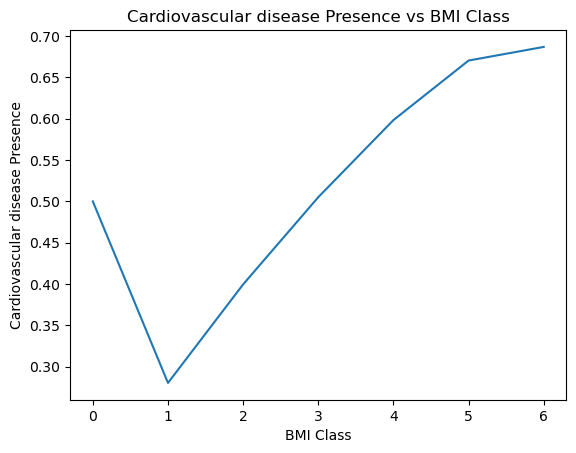

In [30]:
dataset.groupby(by = "bmi_class")[ "cardio"].mean().plot()
plt.title("Cardiovascular disease Presence vs BMI Class")
plt.xlabel("BMI Class")
plt.ylabel("Cardiovascular disease Presence")

# 0 - Anorexic  
# 1 - Underweight 
# 2 - Normal weight
# 3 - Overweight
# 4 - Obesity Class I
# 5 - Obesity Class II
# 6 - Obesity Class III 

# Patients in higher BMI classes have higher chances to have cardiovascular diseases. Anorexic patients also have a higher chance of getting cardiovascular diseases.

<Axes: title={'center': 'BMI vs Cardio Data'}, xlabel='Weight (kgs)', ylabel='Height (cms)'>

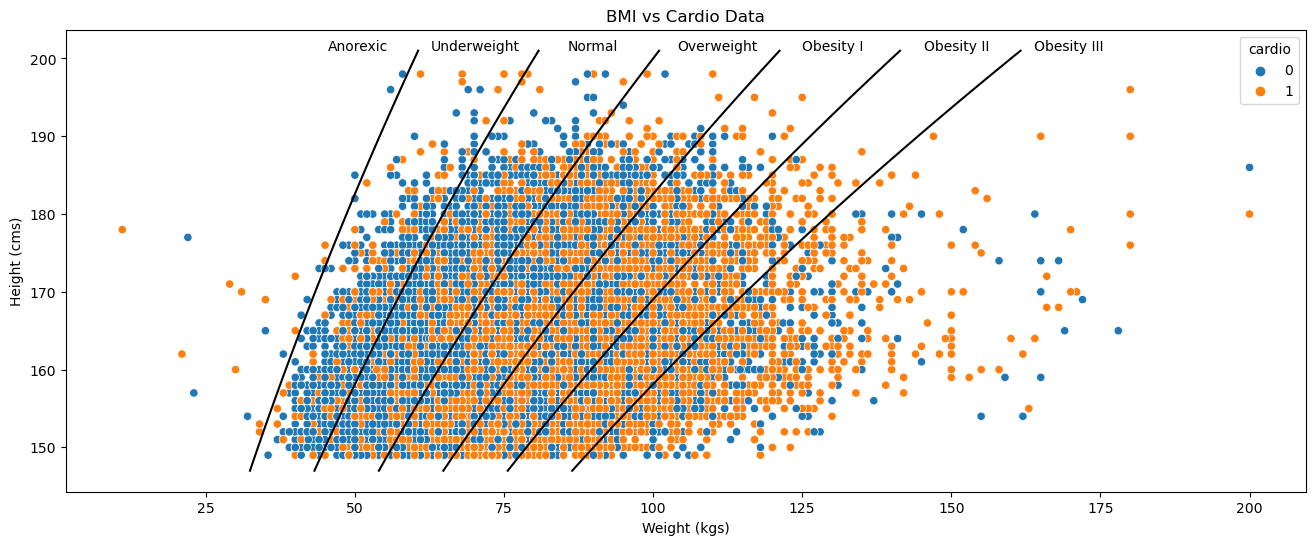

In [36]:
plt.figure(figsize = (16,6))
plt.title("BMI vs Cardio Data")
plt.xlabel("Weight (kgs)")
plt.ylabel("Height (cms)")

y_plot = np.linspace(147,201,100)
x_plot = 15 * (y_plot**2) / 10000
x_plot2 = 20 * (y_plot**2) / 10000
x_plot3 = 25 * (y_plot**2) / 10000
x_plot4 = 30 * (y_plot**2) / 10000
x_plot5 = 35 * (y_plot**2) / 10000
x_plot6 = 40 * (y_plot**2) / 10000

plt.plot(x_plot, y_plot, "black")
plt.plot(x_plot2, y_plot, "black")
plt.plot(x_plot3, y_plot, "black")
plt.plot(x_plot4, y_plot, "black")
plt.plot(x_plot5, y_plot, "black")
plt.plot(x_plot6, y_plot, "black")

plt.text(x_plot[-50], y_plot[-1], "Anorexic")
plt.text(x_plot2[-45], y_plot[-1], "Underweight")
plt.text(x_plot3[-30], y_plot[-1], "Normal")
plt.text(x_plot4[-28], y_plot[-1], "Overweight")
plt.text(x_plot5[-23], y_plot[-1], "Obesity I")
plt.text(x_plot6[-20], y_plot[-1], "Obesity II ")
plt.text(x_plot6[99], y_plot[-1], "   Obesity III ")

sns.scatterplot(data = dataset, x = "weight", y = "height", hue = "cardio")

<Axes: title={'center': 'Cardiovascular disease vs Active'}, xlabel='active', ylabel='count'>

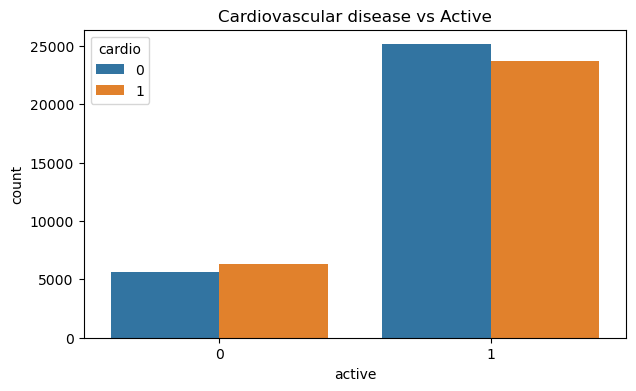

In [37]:
plt.figure(figsize = (7,4))
plt.title("Cardiovascular disease vs Active")
plt.xlabel("Active")

sns.countplot(data = dataset, x = "active",  hue = "cardio")

# Active patients had a slightly lesser chance to have a cardiovascular disease